드라이브와 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


데이터 확인


In [2]:
%cd /content/drive/My Drive/Predicthouseprice

/content/drive/My Drive/Predicthouseprice


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from collections import Counter 
plt.style.use('seaborn') 
sns.set(font_scale=1.5) 
import missingno as msno 
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#판다스로 데이터 읽기
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")


In [5]:
df_train.head()
#df_test.head()
#df_train.shape #1460 81
#df_test.shape #1459 80

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


수치형, 범주형 변수확인하기

In [6]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index  #dtype : datatype
print("Number of Numerical features: ", len(numerical_feats))
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))
print(df_train[numerical_feats].columns) 
print("*"*80)
print(df_train[categorical_feats].columns)


Number of Numerical features:  38
Number of Categorical features:  43
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', '

IQR 이상치제거하기

In [10]:
def detect_outlier(df,n,features):
  outlier_indices=[]
  for col in features: 
   Q1 = np.percentile(df[col], 25) 
   Q3 = np.percentile(df[col], 75) 
   IQR = Q3 - Q1 
   outlier_step = 1.5 * IQR 
   outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
   outlier_indices.extend(outlier_list_col) 
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 

  return multiple_outliers

Outliers_to_drop = detect_outlier(df_train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])




In [16]:
#df_train.loc[Outliers_to_drop]
#df_train=df_train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)
df_train.shape

(1338, 81)

결측치확인하기


In [ ]:
for col in df_train.columns: 
  msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])) 
  print(msperc)


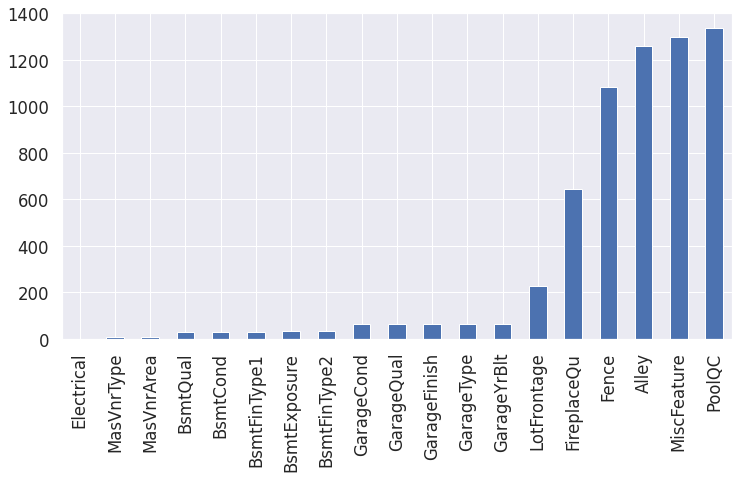

In [19]:
missing = df_train.isnull().sum() 
missing = missing[missing > 0]
missing.sort_values(inplace=True) 
missing.plot.bar(figsize = (12,6))

비대칭도 확인하기

In [20]:
for col in numerical_feats: 
  print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df_train[col].skew()) , ' ' , 'Kurtosis: {:06.2f}'.format(df_train[col].kurt()) )


Id              Skewness: 00.00   Kurtosis: -01.19
MSSubClass      Skewness: 01.37   Kurtosis: 001.49
LotFrontage     Skewness: 01.59   Kurtosis: 013.04
LotArea         Skewness: 07.78   Kurtosis: 123.55
OverallQual     Skewness: 00.16   Kurtosis: -00.05
OverallCond     Skewness: 00.74   Kurtosis: 001.23
YearBuilt       Skewness: -0.58   Kurtosis: -00.60
YearRemodAdd    Skewness: -0.52   Kurtosis: -01.27
MasVnrArea      Skewness: 02.69   Kurtosis: 011.04
BsmtFinSF1      Skewness: 00.65   Kurtosis: -00.50
BsmtFinSF2      Skewness: 04.86   Kurtosis: 026.86
BsmtUnfSF       Skewness: 00.87   Kurtosis: 000.29
TotalBsmtSF     Skewness: 00.29   Kurtosis: 001.17
1stFlrSF        Skewness: 00.66   Kurtosis: 000.02
2ndFlrSF        Skewness: 00.77   Kurtosis: -00.80
LowQualFinSF    Skewness: 12.74   Kurtosis: 170.50
GrLivArea       Skewness: 00.66   Kurtosis: 000.54
BsmtFullBath    Skewness: 00.56   Kurtosis: -00.96
BsmtHalfBath    Skewness: 04.91   Kurtosis: 024.68
FullBath        Skewness: -0.05

In [ ]:
EDA!  

파랑박스는 관계도가 짙다는 소리이다.
즉
1STFlrSF 와 TotalBsmtSF,
Garage
'TotRmsAbvGrd'와 'GrLivArea'의 관계를 볼 수 있고
GrLivArea', 'TotalBsmtSF'및 'OverallQual'은 Target feature와 큰 연관성이 보임.


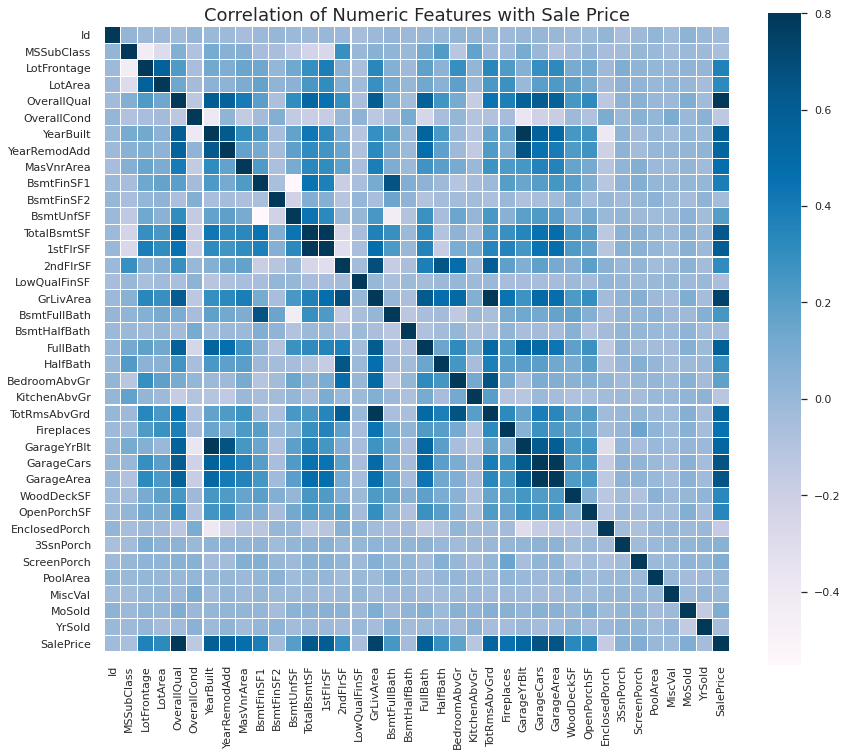

In [21]:
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']] 
colormap = plt.cm.PuBu 
sns.set(font_scale=1.0) 
f , ax = plt.subplots(figsize = (14,12)) 
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18) 
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1, cmap = colormap, linecolor = "white", vmax=0.8)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


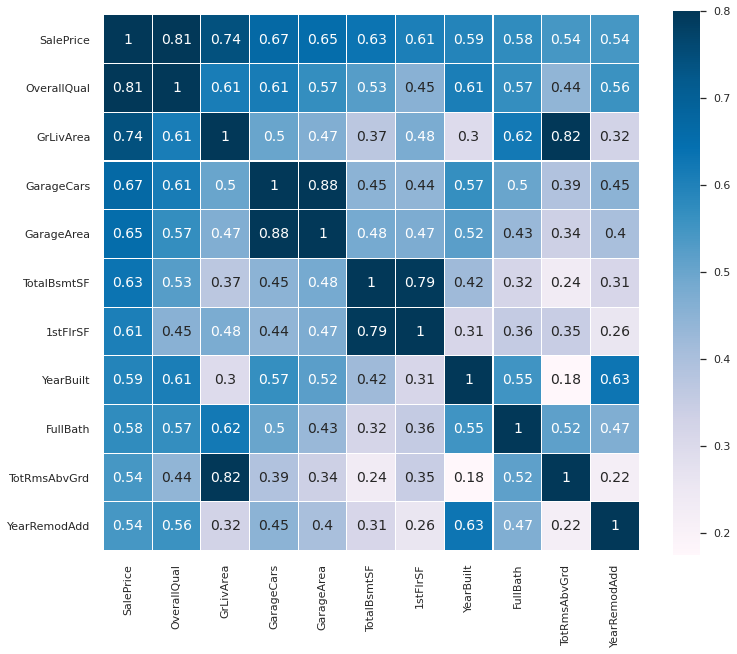

In [23]:
k= 11 
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index 
print(cols) 
cm = np.corrcoef(df_train[cols].values.T) 
f , ax = plt.subplots(figsize = (12,10)) 
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)



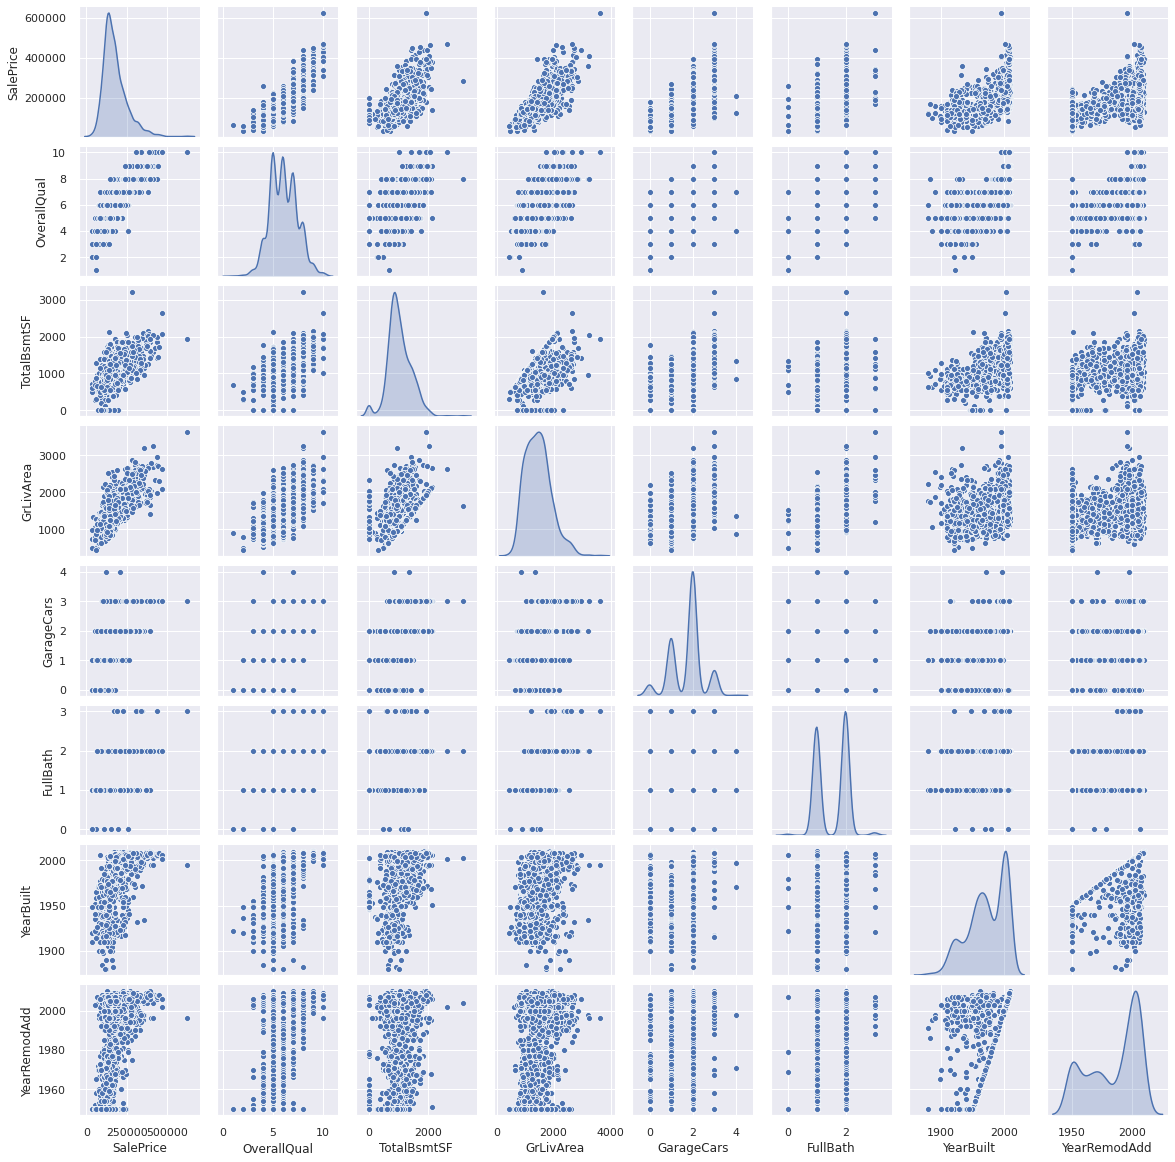

In [24]:
sns.set() 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd'] 
sns.pairplot(df_train[columns],size = 2 ,kind ='scatter',diag_kind='kde') 
plt.show()


범주형 EDA

In [ ]:
li_cat_feats = list(categorical_feats) 
nr_rows = 15 
nr_cols = 3 
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3)) 
for r in range(0,nr_rows): 
  for c in range(0,nr_cols): 
    i = r*nr_cols+c 
    if i < len(li_cat_feats): 
      sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax = axs[r][c]) 
plt.tight_layout() 
plt.show()



최종 변수선정

In [26]:
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars', 'FullBath','YearBuilt','YearRemodAdd'] 
num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 
catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'] 
catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition' ]

